# libraries import.

In [85]:

import numpy as np
import pandas as pd

import scipy

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

import joblib # Zapisywanie modelu
import warnings
warnings.filterwarnings('ignore')

# Understanding and Analyzing the Data Presentation

* Familiarization with the selected dataset and the description of the task at hand.
* Downloading the database to your computer.
* Defining what we already know about the subject.
* The result of this point should be a brief 1-2 page theoretical introduction that analyzes the problem from a business/content perspective.


In [3]:
epi = pd.read_csv("data\\Epicurious_Recipes_with_Rating_and_Nutrition.csv", index_col="title" ) 
epi.head(1)

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
title,,,,,,,,,,,,,,,,,,,,,
"Lentil, Apple, and Turkey Wrap",2.5,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
epi.shape

(20052, 679)

###### We are dealing with the curse of dimensionality


In [5]:
epi.describe()

,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
epi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20052 entries, Lentil, Apple, and Turkey Wrap  to Baked Ham with Marmalade-Horseradish Glaze 
Columns: 679 entries, rating to turkey
dtypes: float64(679)
memory usage: 104.0+ MB


In [7]:
epi.dtypes

rating        float64
calories      float64
protein       float64
fat           float64
sodium        float64
               ...   
cookbooks     float64
leftovers     float64
snack         float64
snack week    float64
turkey        float64
Length: 679, dtype: object

###### our dataset consists entirely of floats, which is a bit strange


##### below we split the data into sets of train, test, and validation datasets for further work with them


In [8]:
y = epi.rating
X = epi.drop("rating", axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.80, random_state= 42 )

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, 
                                                      train_size= 0.70, random_state= 42 )


print("train = ", X_train.shape)
print("test  = ",X_test.shape)
print("validation = ",X_valid.shape)
X_train["rating"] = y_train

train =  (11228, 678)
test  =  (4011, 678)
validation =  (4813, 678)


###### We will check if we have any duplicate indices, and if so, we will remove them to avoid confusion in the future.i


In [9]:
X_train[X_train.index.duplicated(keep = False)].sort_index()

,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,rating
title,,,,,,,,,,,,,,,,,,,,,
Agave-Glazed Turkey Breast with Sherry Gravy,1016.0,133.0,43.0,780.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.375
Agave-Glazed Turkey Breast with Sherry Gravy,1016.0,133.0,43.0,780.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.375
Aji Amarillo-Pineapple Salsa,60.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.375
Aji Amarillo-Pineapple Salsa,60.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.375
Almond Butter Crisps,18.0,1.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Za'atar,4.0,0.0,0.0,210.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000
Za'atar,4.0,0.0,0.0,210.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.000
Za'atar,90.0,3.0,5.0,487.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [10]:
X_train = X_train[~X_train.index.duplicated(keep='first')]
print(X_train.shape)
X_train[X_train.index.duplicated(keep = False)].sort_index()

(10424, 679)


,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,rating
title,,,,,,,,,,,,,,,,,,,,,


# Preliminary Exploration of the Provided Database
* Familiarizing yourself with the downloaded database (connecting to it through Python using well-known libraries like pandas and numpy).
* Data preparation, including:
    * Separation into numerical and categorical features.
    * Data preparation (removing or transforming incomplete values).
    * Aggregating necessary information.
    * Data cleaning.
    * Transformation, discretization, scaling, grouping, etc. - use what is relevant to your specific problem.
* Displaying basic statistics (mean, standard deviation, median) that are useful for problem alysis.
problemu


## future cleaning

In [11]:
X_train.shape

(10424, 679)

In [12]:
# percentage of data lost
lost_data_percentiles = X_train.isnull().sum() / X_train.isnull().count()
lost_data_percentiles

calories      0.207982
protein       0.209325
fat           0.210188
sodium        0.208078
#cakeweek     0.000000
                ...   
leftovers     0.000000
snack         0.000000
snack week    0.000000
turkey        0.000000
rating        0.000000
Length: 679, dtype: float64

In [13]:
# let's see where and what this data looks like
missing_rows = X_train[np.isnan(X_train).any(axis =1 )] 
print("len missing rows = ", missing_rows.shape[0])
print("number of missing data in individual columns :\n", missing_rows.isna().sum())
missing_rows[~np.isnan(missing_rows).all(axis =1 )] #39 poems that contain more than just nana

len missing rows =  2194
number of missing data in individual columns :
 calories      2168
protein       2182
fat           2191
sodium        2169
#cakeweek        0
              ... 
leftovers        0
snack            0
snack week       0
turkey           0
rating           0
Length: 679, dtype: int64


,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,...,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey,rating
title,,,,,,,,,,,,,,,,,,,,,
"Fettucine with Peas, Asparagus, and Pancetta",NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.375
"Chicken Stir-fry with Yams, Red Cabbage, and Hoisin",NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.750
Pickled Mustard Greens,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.750
Mango-Banana Cake,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.750
Baccalà Mantecato: A Savory Spread of Whipped Salt Cod,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Spiced Beef Tenderloin Steaks with Mango Salsa,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.375
White Bean and Pasta Soup,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.750
Sweet Potato and Brussels Sprout Okonomiyaki,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


##### filling this data with some mean or median values in such an amount could provide a lot of false information to our model in the future, since we have data gaps in almost all cases in one row, we will simply remove them

In [14]:
X_train = X_train.dropna(axis=0 , how="any")
X_train.isna().sum()

calories      0
protein       0
fat           0
sodium        0
#cakeweek     0
             ..
leftovers     0
snack         0
snack week    0
turkey        0
rating        0
Length: 679, dtype: int64

In [15]:
def selected_binary(X: pd.DataFrame) -> pd.DataFrame:
    """
    Separates data into binary and non-binary columns.

    Args:
    X (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: Returns a tuple containing the names of non-binary columns (X) and binary columns (columny_binarne).

    The function first calculates the number of unique values in each column of the input DataFrame. It then identifies columns with only 2 unique values as binary columns and the rest as non-binary columns. The function returns the names of non-binary columns and binary columns as a tuple.

    Example:
    >>> import pandas as pd
    >>> data = pd.DataFrame({'A': [0, 1, 0, 1], 'B': [0, 0, 1, 1], 'C': [0, 1, 2, 3]})
    >>> selected_binary(data)
    (Index(['C'], dtype='object'), Index(['A', 'B'], dtype='object'))
    """
    nunique = X.nunique()
    columny_binarne = X[nunique[nunique == 2].index]
    X = X[nunique[nunique > 2].index]
    return X.columns, columny_binarne.columns


not_binarne, binarne =  selected_binary(X_train)

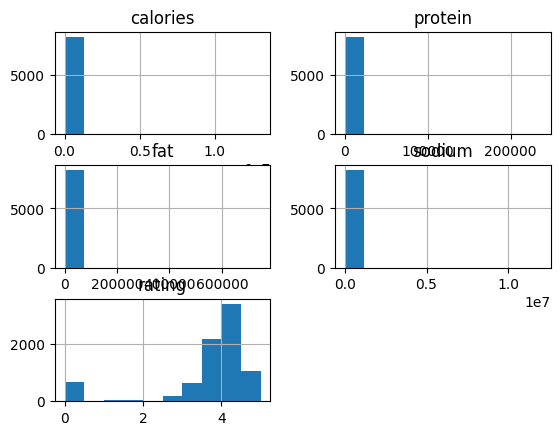

In [16]:
X_train[not_binarne].hist(); 

###### we are having some data issues

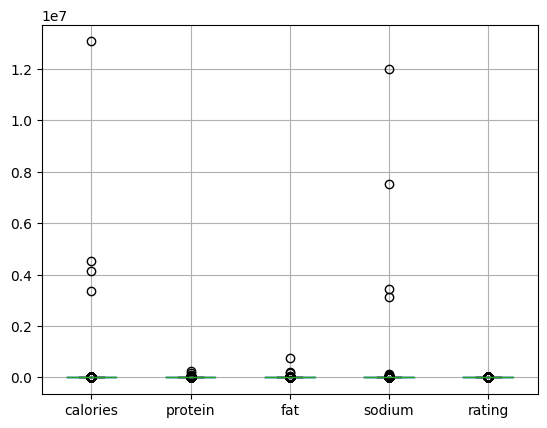

In [17]:
X_train[not_binarne].boxplot();

##### our max value is very high in protein and fat, our problems are called outliers

###### in this case it would be possible to normalize the data by using the interquartile range $IQR=Q3(x)−Q1(x)$ , but this would be an error because in this case we would be entering the wrong data into our columns


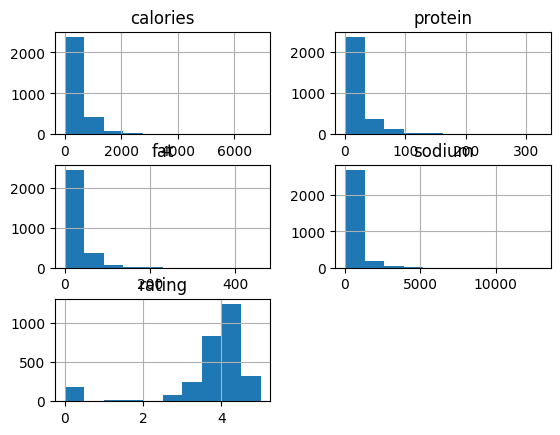

In [18]:
X = X_train.copy()


def outlier_boundary(X: np.array) -> tuple:
    """
    Computes the lower and upper boundaries for identifying outliers using the Interquartile Range (IQR) method.

    Args:
    X (np.array): An array of numerical data for which outlier boundaries need to be calculated.

    Returns:
    tuple: A tuple containing the lower boundary and upper boundary for identifying outliers.

    The function calculates the lower and upper boundaries for outlier detection based on the Interquartile Range (IQR) method. The IQR is defined as the difference between the third quartile (Q3) and the first quartile (Q1). The lower boundary is computed as Q1 - 1.5 * IQR, and the upper boundary is computed as Q3 + 1.5 * IQR.

    Example:
    >>> import numpy as np
    >>> data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 100])
    >>> outlier_boundary(data)
    (-4.5, 12.5)
    """
    K = 1.5

    q3 = np.quantile(X, .99)  # Adjusted for the 99th percentile to handle extreme outliers
    q1 = np.quantile(X, .01)  # Adjusted for the 1st percentile to handle extreme outliers
    iqr = q3 - q1

    lower_boundary = q1 - K * iqr
    upper_boundary = q3 + K * iqr
    
    return lower_boundary, upper_boundary




outlier_indices = []
for column in X.columns:
    if column != "rating":
        lower_boundary, upper_boundary = outlier_boundary(X[column])
        outliers = X.loc[(X[column] < lower_boundary) | (X[column] > upper_boundary), column]

        outlier_indices.extend(outliers.index)
    
# выбросы 
X = X.loc[~X.index.isin(outlier_indices)].sort_index()
X[not_binarne].hist();

In [19]:
print(X_train[not_binarne].nunique())
X[not_binarne].nunique()

calories    1535
protein      220
fat          251
sodium      1952
rating         8
dtype: int64


calories    1076
protein      154
fat          165
sodium      1166
rating         8
dtype: int64

<!-- no i mamy piękny log normalne rozkład   -->

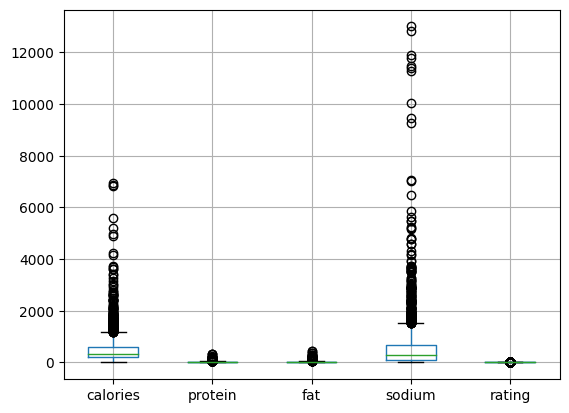

In [20]:
 X[not_binarne].boxplot();

but we still have an outlander and this is actually normal because we know that some dishes can be very high in calories.e.

###### Standardize features by removing the mean and scaling to unit variance.

In [23]:
scaler = StandardScaler()
X_train[not_binarne[:-1]] = pd.DataFrame(scaler.fit_transform(X_train[not_binarne[:-1]]),  
                                    columns = not_binarne[:-1] , index= X_train[not_binarne[:-1]].index )

## future selected

[Feature importances with a forest of trees](https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html)

In [24]:
rfr = RFR(random_state=42)
rfr.fit(X_train.loc[:, X_train.columns != "rating"], X_train["rating"])

# Get feature importance values
feature_importance = rfr.feature_importances_
feature_importance_df = pd.DataFrame({'feature': X_train.loc[:, X_train.columns != "rating"].columns, 
                                      'importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

selected_features = feature_importance_df[feature_importance_df.importance > 0.0]
selected_features

,feature,importance
3,sodium,7.986442e-02
0,calories,7.246794e-02
2,fat,4.597915e-02
1,protein,4.077725e-02
281,house & garden,3.795931e-02
...,...,...
283,houston,3.014649e-07
223,france,2.682521e-07
424,omelet,2.643456e-07
157,costa mesa,2.588179e-07


[PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [25]:
pca = PCA(n_components=3)
pca.fit(X_train.loc[:, X_train.columns != "rating"])

# Get a component matrix (components_) that shows the importance of the initial characteristics for each component
components = pca.components_

# Create a DataFrame for convenience
components_df = pd.DataFrame(components, columns=X_train.loc[:, X_train.columns != "rating"].columns)

def top_components(components_df, top_n=3):
    print(f"Top-{top_n} most important functions of each PCA component:")
    for i in range(components_df.shape[0]):
        print(f"Component {i + 1}:")
        top_features = components_df.loc[i].nlargest(top_n)
        for feature, importance in top_features.items():
            print(f"{feature}: {importance}")
        print("\n")
    
X_pca = pca.transform(X_train.loc[:, X_train.columns != "rating"])
top_components(components_df, top_n=5)

Top-5 najważniejsze funkcje każdego komponentu PCA:
Komponenta 1:
calories: 0.5356326264850256
sodium: 0.5278641632279129
fat: 0.5067623772238659
protein: 0.4208459927167637
fall: 0.007441385797253719


Komponenta 2:
peanut free: 0.40506680647895416
soy free: 0.4011481575800004
kosher: 0.35749296773273015
pescatarian: 0.3574135028627157
tree nut free: 0.34386169191519755


Komponenta 3:
protein: 0.7874824519254846
gourmet: 0.11205811912807269
no sugar added: 0.1108829763865878
wheat/gluten-free: 0.08933163863429416
dairy free: 0.08867510807086532




In [32]:
X_train_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'], index= X_train.index)
X_train_pca["rating"] = X_train[["rating"]]
X_train_pca

,PCA1,PCA2,PCA3,rating
title,,,,
Chicken in Red Wine Sauce with Root Vegetables and Wilted Greens,-0.011673,0.174576,0.171072,3.750
Court Bouillon,-0.055710,-1.061787,0.178864,4.375
Tiny Baked Potatoes with Chervil Cream,-0.053990,-0.810833,-0.071983,3.750
Pinto Bean Enfrijoladas,-0.020082,1.707208,-0.155366,3.750
Mustard-Citrus Grilled Steak,-0.021940,0.903164,0.600683,4.375
...,...,...,...,...
Soba Salad with Miso Dressing,-0.029433,1.172725,0.271952,4.375
Melon with Basil-Lime Granita,-0.053022,-0.686158,0.039043,5.000
Shrimp Cakes with Andouille Sausage,-0.040620,0.281480,0.175290,4.375


In [35]:
X_train_pca.corr("kendall").style.background_gradient(axis=0)

,PCA1,PCA2,PCA3,rating
PCA1,1.000000,0.473075,-0.097114,0.094679
PCA2,0.473075,1.000000,-0.017782,0.035716
PCA3,-0.097114,-0.017782,1.000000,-0.019220
rating,0.094679,0.035716,-0.019220,1.000000


##### korelacja jest  niska z naszym target 


* There were gaps in our data that could not be filled because using values such as mean, median would lead to large errors and imbalances, which would badly affect our model.

* We also have outliers in the data that are actually relevant, as there are foods that are very low and conversely very high in calories, etc.

* We used the logarithm because the data showed multicollinearity - high correlation between independent values, but we also left the original values because they may be useful to us in the future.

*Unfortunately, we cannot use linear regression because our data is very interconnected and we also have outliers.

* We will use machine learning algorithms for decision trees (Decision Tree) and even more complex decision trees (Random Forest Regressor),
and we will also experiment with linear regression with L1 and L2 regularization as they may underestimate or even invalidate unnecessary features.

* To select parameters we will use GridSearchC

<!-- # Analiza, wizualizacja danych oraz przeprowadzenie analizy statystycznej w języku Python
Skoro już wiemy co będziemy analizować musimy dokładniej opisać dane za pomocą:
* Wykresów:
   * Wykresy liniowe, histogramy opisujące zależności między pojedynczymi zmiennymi
   * Wykresy opisujące zależności między zmiennymi (Q-Q plot, wykres punktów, mapy ciepła, wykresy słupkowe)
   * Wykresy zmienności w czasie (wykres liniowy)
   * Zaawansowana wizualizacja z wykorzystaniem plotly lub seaborn -->

* Using all the information we have collected regarding a given problem, especially the description of the data from the previous point, propose 3 algorithms that will be implemented
* Implementation of linear (1 and multivariate), polynomial and decision tree regression algorithms
* Ensure cost function is minimized, if necessary using gradient descent or another built-in function in sklearn
* Displaying the cost function values on the chart for 10 and 20 iterations and the algorithm weights
* Algorithm prediction for 3 random values from outside the data set

In [86]:
rfr = RFR(criterion="squared_error", random_state= 42, n_jobs = -1)
ridge = Ridge(random_state= 42)
lasso = Lasso(random_state= 42 )

regressor = LinearRegression()
poly = PolynomialFeatures()


[Random Forest Regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html)

In [39]:
params = {
    "n_estimators": range(100,500,50),
    "max_depth" : range(2,10,1),
    "min_samples_split": range(int(X_train.shape[0] / 100 * 5),
                               int(X_train.shape[0] / 100 * 20),
                               int(X_train.shape[0] / 100 * 5) ),
    "bootstrap" : [True, False]
}

clf_rfr = GridSearchCV(rfr , param_grid= params, cv= 5, scoring='neg_mean_squared_error')

[Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)

In [40]:
params = {
    'alpha': np.arange(10.0, 20.0, 0.001),
    'fit_intercept': [True, False],
}

clf_ridge = GridSearchCV( ridge, param_grid=params, cv= 5, scoring='neg_mean_squared_error')

[Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [41]:
params = {
    'alpha': np.arange(0.001, 1.0, 0.0025),
    'fit_intercept': [True, False]
}


clf_lasso = GridSearchCV(  lasso, param_grid=params, cv= 5, scoring='neg_mean_squared_error')

[PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

[Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html)

In [94]:
params = {
    'poly__degree': [2, 3, 4],  # Разные степени полиномиальных признаков
    'poly__interaction_only': [True, False],
    "poly__include_bias" : [True, False]
}

model_poly = Pipeline([('poly', poly), ('regressor', regressor)])
clf_poly = GridSearchCV(model_poly, param_grid=params, cv= 5, scoring='neg_mean_squared_error')

In [44]:
y = X_train_pca.rating
X = X_train_pca.loc[:, X_train_pca.columns != "rating"]

##### trenujemy GridSearchCV

In [95]:
# clf_rfr.fit(X,y)
# clf_ridge.fit(X,y)
# clf_lasso.fit(X,y)
clf_poly.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('regressor', LinearRegression())]),
             param_grid={'poly__degree': [2, 3, 4],
                         'poly__include_bias': [True, False],
                         'poly__interaction_only': [True, False]},
             scoring='neg_mean_squared_error')

In [97]:
print("clf_rfr", clf_rfr.best_params_)
print("clf_ridge", clf_ridge.best_params_)
print("clf_lasso", clf_lasso.best_params_)
print("clf_poly", clf_poly.best_params_)

# clf_rfr {'bootstrap': True, 'max_depth': 7, 'min_samples_split': 411, 'n_estimators': 250}
# clf_ridge {'alpha': 19.99899999999446, 'fit_intercept': True}
# clf_lasso {'alpha': 0.0085, 'fit_intercept': True}
# clf_lasso {'poly__degree': 2, 'poly__include_bias': False, 'poly__interaction_only': True}

clf_rfr {'bootstrap': True, 'max_depth': 7, 'min_samples_split': 411, 'n_estimators': 250}
clf_ridge {'alpha': 19.99899999999446, 'fit_intercept': True}
clf_lasso {'alpha': 0.0085, 'fit_intercept': True}
clf_poly {'poly__degree': 2, 'poly__include_bias': False, 'poly__interaction_only': True}


In [111]:
rfr = RFR( bootstrap=True, max_depth=7, min_samples_split=411,
          n_estimators=250, random_state= 42, n_jobs= -1)

ridge = Ridge(alpha = 19.99899999999446, fit_intercept= True, random_state= 42)
lasso = Lasso(alpha= 0.0085, fit_intercept= True , random_state= 42)

poly = PolynomialFeatures(degree = 2, include_bias = False, interaction_only = True)
X_pol = poly.fit_transform(X)
pol_reg = LinearRegression()

In [112]:
rfr.fit(X,y)
ridge.fit(X,y)
lasso.fit(X,y)
pol_reg = pol_reg.fit(X_pol, y)

In [104]:
# Zapisywanie modelu
joblib.dump(rfr,   'models\\model_rfr.pkl')
joblib.dump(ridge, 'models\\model_ridge.pkl')
joblib.dump(lasso, 'models\\model_lasso.pkl')

['models\\pol_reg.pkl']

In [105]:
# Ładowanie modelu
rfr = joblib.load('models\\model_rfr.pkl')
ridge = joblib.load('models\\model_ridge.pkl')
lasso = joblib.load('models\\model_lasso.pkl')

In [113]:
print("clf_rfr", rfr.get_params)
print("clf_ridge", ridge.get_params)
print("clf_lasso", lasso.get_params)

clf_rfr <bound method BaseEstimator.get_params of RandomForestRegressor(max_depth=7, min_samples_split=411, n_estimators=250,
                      n_jobs=-1, random_state=42)>
clf_ridge <bound method BaseEstimator.get_params of Ridge(alpha=19.99899999999446, random_state=42)>
clf_lasso <bound method BaseEstimator.get_params of Lasso(alpha=0.0085, random_state=42)>


# Evaluation of the algorithm's performance
* Splitting the data into a training and validation set
* Use of cross-validation and leave-one-out (shuffle the set so that
always start from a different place in the data)
* Evaluate the performance of models (coefficient of determination, 2 error methods
forecasts)
* Solved the problem of over- or under-training of the algorithm
* Finding a happy medium between bias and variance, preferably
showing it on a chartie

In [114]:
rfr.fit(X,y)
ridge.fit(X,y)
lasso.fit(X,y)
pol_reg = pol_reg.fit(X_pol, y)

In [116]:
rfr_pred = rfr.predict(X)
rodge_pred = ridge.predict(X)
laso_pred = lasso.predict(X)
pol_pred =  pol_reg.predict(X_pol)

In [122]:
def scor(y_true, y_pred) -> None:
    print("r2", round(r2(y_true=y_true, y_pred=y_pred), 2))
    print("mae", round(mae(y_true=y_true, y_pred=y_pred), 2))
    print("rmse", round(np.sqrt(mae(y_true=y_true, y_pred=y_pred)), 2))
    print()
    
for y_pred, name_metod in zip((y_pred_rfr, y_pred_ridge, y_pred_lasso, pol_pred),
                             ('rfr', 'ridge', 'lasso', "pol_reg")) :
    print(name_metod)
    scor(y, y_pred)
    print()

rfr
r2 0.06
mae 0.88
rmse 0.94


ridge
r2 0.0
mae 0.86
rmse 0.93


lasso
r2 0.0
mae 0.86
rmse 0.93


pol_reg
r2 0.01
mae 0.86
rmse 0.93




In [56]:
def transform_data_for_model(X: pd.DataFrame, y: pd.Series):
    """
    Transforms the input data for model training.

    Args:
    X (pd.DataFrame): The input DataFrame containing the features.
    y (pd.Series): The target variable series.

    Returns:
    pd.DataFrame, pd.Series: Returns the transformed feature matrix (X) and the target variable (y).

    The function performs various data transformation steps, including adding the target variable to the feature matrix, removing duplicates and NaN values, identifying binary and non-binary columns, scaling non-binary columns, performing PCA on the feature matrix, and separating the target variable from the feature matrix.

    Note that outliers are not removed from the test dataset as it may lead to distorted results and incorrect model performance evaluation.

    Example:
    >>> import pandas as pd
    >>> X = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
    >>> y = pd.Series([7, 8, 9])
    >>> transform_data_for_model(X, y)
    (     PCA1  PCA2  PCA3
    0 -1.224745   0.0   0.0
    1  0.000000   0.0   0.0
    2  1.224745   0.0   0.0, 0    7
    1    8
    2    9
    dtype: int64)
    """
    # Adding the target variable to the feature matrix
    X["rating"] = y
    # Removing duplicate indices
    X = X[~X.index.duplicated(keep='first')]
    # Dropping rows with NaN values
    X = X.dropna(axis=0, how="any")

    # Identifying binary and non-binary columns
    non_binary, binary = selected_binary(X)

    # Scaling non-binary columns
    X[non_binary[:-1]] = pd.DataFrame(scaler.fit_transform(X[non_binary[:-1]]), 
                                    columns=non_binary[:-1], index=X[non_binary[:-1]].index)

    # Performing PCA on the feature matrix
    X_pca = pca.transform(X.loc[:, X.columns != "rating"])
    X_train_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'], index=X.index)

    # Adding the target variable back to the transformed feature matrix
    X_train_pca["rating"] = X[["rating"]]
    # Separating the target variable from the feature matrix
    y = X_train_pca.rating
    X = X_train_pca.loc[:, X_train_pca.columns != "rating"]

    return X, y


X, y = transform_data_for_model(X_valid, y_valid)

In [124]:
y_pred_rfr   = rfr.predict(X)
y_pred_ridge = ridge.predict(X)
y_pred_lasso = lasso.predict(X)
pol_pred =  pol_reg.predict( poly.transform(X))
models = [rfr, ridge, lasso, pol_pred]

In [125]:
for y_pred, name_metod in zip((y_pred_rfr, y_pred_ridge, y_pred_lasso, pol_pred),
                             ('rfr', 'ridge', 'lasso', "pol_reg")) :
    print(name_metod)
    scor(y, y_pred)
    print()

rfr
r2 0.09
mae 0.84
rmse 0.92


ridge
r2 0.0
mae 0.87
rmse 0.93


lasso
r2 0.0
mae 0.87
rmse 0.93


pol_reg
r2 0.01
mae 0.86
rmse 0.93




In [127]:
# We calculate the difference between actual and predicted values
diff_rfr = y - y_pred_rfr
diff_ridge = y - y_pred_ridge
diff_lasso = y - y_pred_lasso
diff_pol = y - pol_pred

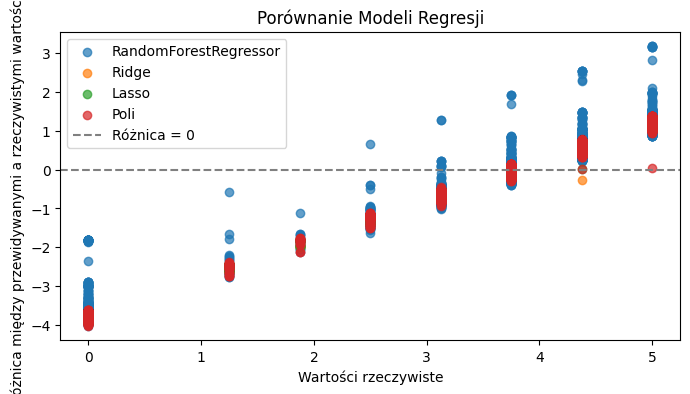

In [133]:
plt.figure(figsize=(8, 4))

# We add data to the charts
plt.scatter(y, diff_rfr, label='RandomForestRegressor', alpha=0.7)
plt.scatter(y, diff_ridge, label='Ridge', alpha=0.7)
plt.scatter(y, diff_lasso, label='Lasso', alpha=0.7)
plt.scatter(y, diff_pol, label='Poli', alpha=0.7)

# We add a zero line
plt.axhline(0, linestyle='--', color='gray', label='Różnica = 0')


plt.xlabel('Actual values')
plt.ylabel('Difference between predicted and actual values')
plt.legend()
plt.title('Comparison of Regression Models')



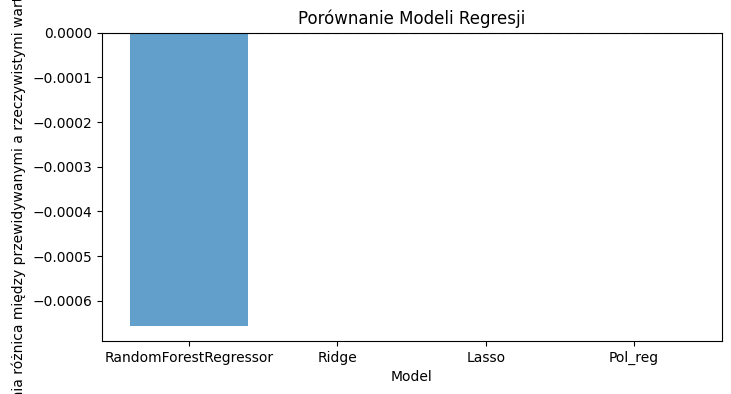

In [130]:
plt.figure(figsize=(8, 4))

plt.bar(['RandomForestRegressor', 'Ridge', 'Lasso', "Pol_reg"], [diff_rfr.mean(), diff_ridge.mean(),
                                                      diff_lasso.mean(), diff_pol.mean()], alpha=0.7)

plt.axhline(0, linestyle='--', color='gray', label='Różnica = 0')

plt.xlabel('Model')
plt.ylabel('Average difference between predicted and actual values')
plt.title('Comparison of Regression Models'


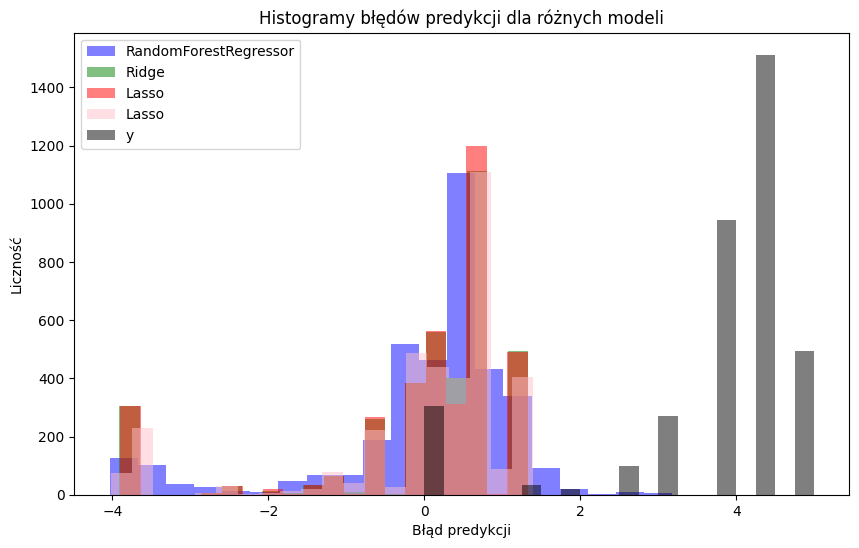

In [132]:
plt.figure(figsize=(10, 6))

plt.hist(diff_rfr, bins=20, alpha=0.5, label='RandomForestRegressor', color='blue')
plt.hist(diff_ridge, bins=20, alpha=0.5, label='Ridge', color='green')
plt.hist(diff_lasso, bins=20, alpha=0.5, label='Lasso', color='red')
plt.hist(diff_pol, bins=20, alpha=0.5, label='Lasso', color='pink')


plt.hist(y, bins=20, alpha=0.5, label='y', color='black')

plt.xlabel('Prediction error')
plt.ylabel('Cardinality')
plt.legend()
plt.title('Histograms of prediction errors for different models
